<a href="https://colab.research.google.com/github/AJ-Horch/grounded_data_analyst/blob/main/analsying_moive_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# need to open the raw github file to import the file
admissions_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/admissions.csv"
admissions = pd.read_csv(admissions_url)

In [9]:
admissions.head()

,Year,Month,Admissions (million)
0,2018,January,16.2
1,2018,February,16.1
2,2018,March,13.5
3,2018,April,15.5
4,2018,May,13.7


In [10]:
genres_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/genres%20(1).csv"
distributors_url = "https://raw.githubusercontent.com/AJ-Horch/grounded_data_analyst/refs/heads/main/distributors%20(2).csv"

genres = pd.read_csv(genres_url)
distributors = pd.read_csv(distributors_url)

genres.head()


,Year,Genre,Number of releases,Gross box office (£ million),Top performing title
0,2018,Action,77,361.3,Avengers: Infinity War
1,2018,Animation,46,242.2,Incredibles 2
2,2018,Drama,246,154.1,A Star Is Born
3,2018,Comedy,144,88.3,Johnny English Strikes Again
4,2018,Biopic,5,78.5,Bohemian Rhapsody


In [11]:
distributors.head()

,Year,Distributor,Films on release,Box office gross (£ million),Market share
0,2018,Walt Disney,24,325.6,23.6
1,2018,Universal,40,268.5,19.5
2,2018,20th Century Fox,28,199.3,14.5
3,2018,Warner Bros,31,191.4,13.9
4,2018,Sony,33,146.8,10.7


### Divide the dataset
Divide the dataset into three periods: pre-COVID, COVID, Post-Covid. To do this I'll create a date column

In [12]:
admissions.tail()

,Year,Month,Admissions (million)
43,2021,August,10.4
44,2021,September,6.5
45,2021,October,16.4
46,2021,November,8.8
47,2021,December,13.5


I need to add a spacebetween the day and month for the next bit of code to work

In [13]:
COVID_START_DATE = datetime.datetime(2020, 3, 1)
LOCKDOWN_END_DATE = datetime.datetime(2021, 7, 1)


In [14]:

admissions["date"] = (
    "1 " +
    admissions["Month"] +
    " " +
    admissions["Year"].astype(str)
)

admissions["date"] = pd.to_datetime(admissions["date"], format="%d %B %Y")
admissions.head()

,Year,Month,Admissions (million),date
0,2018,January,16.2,2018-01-01
1,2018,February,16.1,2018-02-01
2,2018,March,13.5,2018-03-01
3,2018,April,15.5,2018-04-01
4,2018,May,13.7,2018-05-01


In [15]:
admissions.tail()

,Year,Month,Admissions (million),date
43,2021,August,10.4,2021-08-01
44,2021,September,6.5,2021-09-01
45,2021,October,16.4,2021-10-01
46,2021,November,8.8,2021-11-01
47,2021,December,13.5,2021-12-01


Apply the cutoff dates to the data. I'll use the Categorial data type in pandas to ensure the correct order is observed when sorting; otherwise, these periods would be sorted alphabetcially.

In [16]:
admissions.loc[admissions['date'] <= COVID_START_DATE, "covid_period"] = 'pre-COVID'
admissions.loc[admissions['date'].between(COVID_START_DATE, LOCKDOWN_END_DATE, 'left'), 'covid_period'] = 'during COVID'
admissions.loc[admissions['date'] >= LOCKDOWN_END_DATE, 'covid_period'] = 'post-lockdown'

# make it categorical
admissions['covid_period'] = (
    pd.Categorical(
        admissions['covid_period'],
        categories=['pre-COVID', 'during COVID', 'post-lockdown'],
        ordered=True
    )
)

admissions['covid_period'].value_counts(dropna=False)

,count
covid_period,
pre-COVID,26
during COVID,16
post-lockdown,6


In [17]:
admissions.tail(10)

,Year,Month,Admissions (million),date,covid_period
38,2021,March,NaN,2021-03-01,during COVID
39,2021,April,NaN,2021-04-01,during COVID
40,2021,May,3.5,2021-05-01,during COVID
41,2021,June,7.0,2021-06-01,during COVID
42,2021,July,7.8,2021-07-01,post-lockdown
43,2021,August,10.4,2021-08-01,post-lockdown
44,2021,September,6.5,2021-09-01,post-lockdown
45,2021,October,16.4,2021-10-01,post-lockdown
46,2021,November,8.8,2021-11-01,post-lockdown
47,2021,December,13.5,2021-12-01,post-lockdown


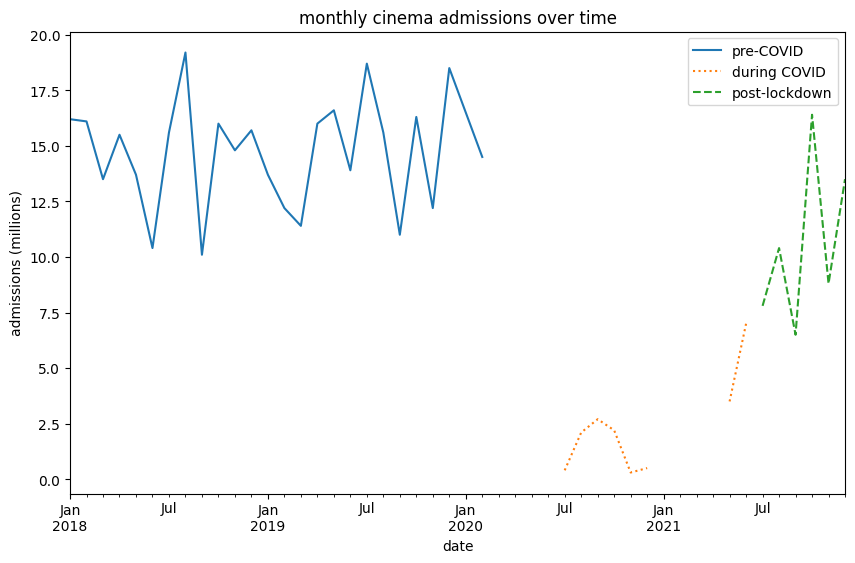

In [18]:
fig, axis = plt.subplots(figsize=(10, 6))

linestyles = ['solid', 'dotted', 'dashed']

for idx, covid_period in enumerate(admissions['covid_period'].value_counts().index):
  (
      admissions
      .query(f"covid_period=='{covid_period}'")
      .set_index("date")
      ["Admissions (million)"]
      .plot(ax=axis, label=covid_period, linestyle=linestyles[idx])
  )

axis.set(
      title="monthly cinema admissions over time",
      ylabel="admissions (millions)"
  )

axis.legend()

plt.show()




There's a clear dropoff when covid hit and then a smal bump with some during covid. It appears as though things began reutning to pre-pandmemic levels. It would be interesting to add more post-pandemic data to this, check out seasonality.

Next I'll look t the average monthly admissions in the three periods

<ipython-input-19-39ce4ab28511>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('covid_period')


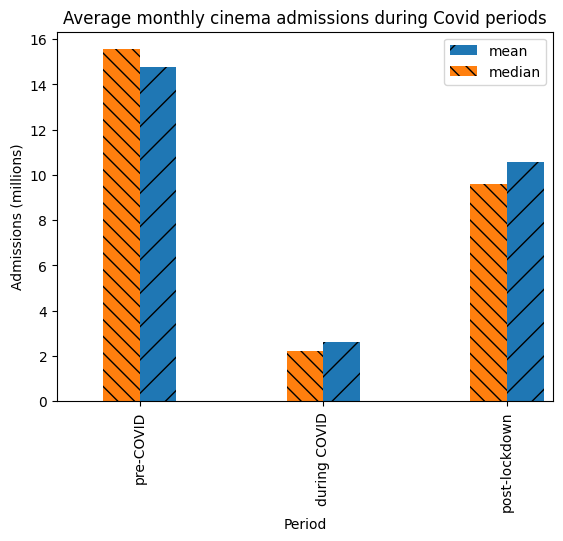

In [19]:
fig, axis = plt.subplots()

admissions_by_period = (
    admissions
    .groupby('covid_period')
    ["Admissions (million)"]
    .agg(['mean', 'median'])
)

# Create a barplot for each metric with differnt hatch patterns
for i, metric in enumerate(admissions_by_period.columns):
  hatch="/" if i == 0 else "\\\\" # different hatch patterns for different metrics
  color = "C0" if i == 0 else "C1" # Different colors for different colors
  admissions_by_period[metric].plot(kind='bar', ax=axis, position=i,
                                    hatch=hatch, label=metric, width=0.2, color=color)

axis.set(
    title="Average monthly cinema admissions during Covid periods",
    ylabel="Admissions (millions)",
    xlabel="Period",
    xticklabels = admissions_by_period.index
)

axis.legend()

plt.show()

I looked at both the mean and median to investigae whether the data is skewed in either direction. Do pre-covid or post-lockdown months tend to have outliers in either direction? Will use histograms to investigate further.

Interesting that in the above graph, the mean and median revseres.

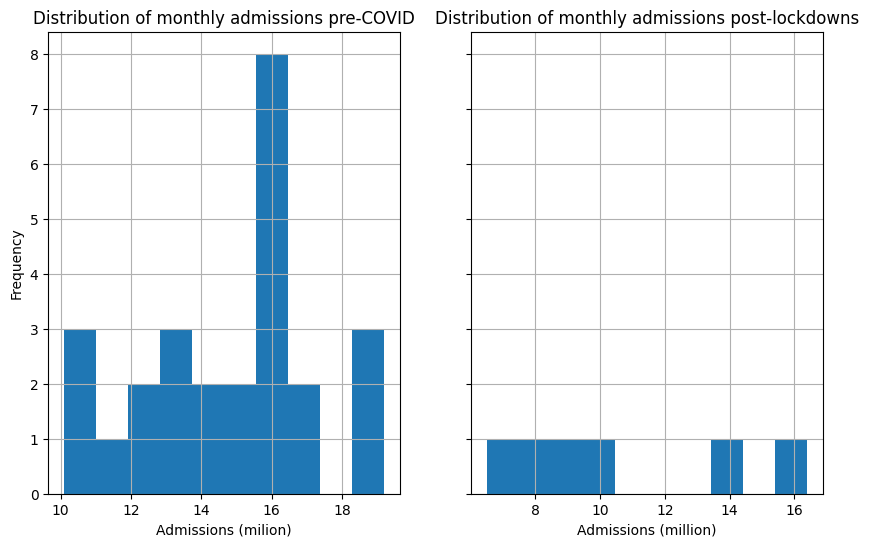

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), sharey=True)

(
    admissions
    .loc[admissions['covid_period'] == 'pre-COVID', 'Admissions (million)']
    .hist(bins=10, ax=axes[0])
)

axes[0].set(
    title="Distribution of monthly admissions pre-COVID",
    xlabel="Admissions (milion)",
    ylabel="Frequency"
)

(
    admissions
    .loc[admissions['covid_period'] == 'post-lockdown', 'Admissions (million)']
    .hist(ax=axes[1])
)

axes[1].set(
    title="Distribution of monthly admissions post-lockdowns",
    xlabel='Admissions (million)'
)

plt.show()

There is less data post-lockdowns and because of the low intitial numbers we have more of a right skew (pre-COVIF we havd more of the left skew)

Going to look at monthly admission patterns

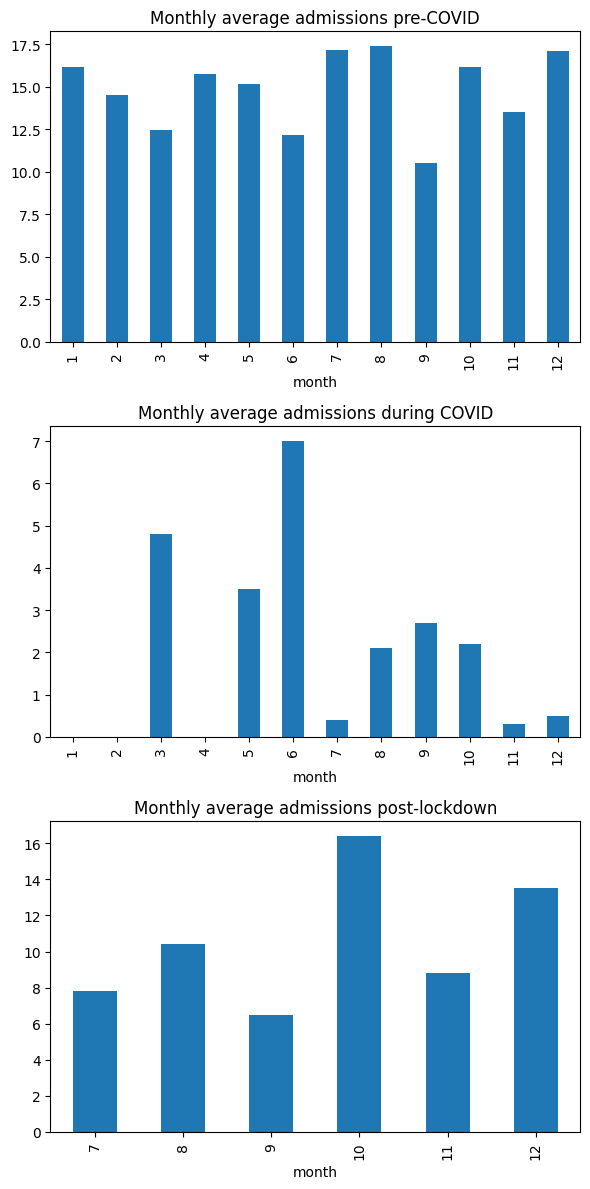

In [21]:
fig, axes = plt.subplots(3,1, figsize=(6,12))

for idx, period in enumerate(admissions['covid_period'].unique()):
  (
      admissions.assign(month=admissions['date'].dt.month) # format date
      .query(f"covid_period == '{period}'")
      .groupby('month')
      ["Admissions (million)"]
      .median()
      .plot
      .bar(ax=axes[idx])
  )

  axes[idx].set(
      title=f"Monthly average admissions {period}"
  )

plt.tight_layout()
plt.show()

Admissions have not returned to pre-covid trends (yet). might need to get more data

# Genres

In [22]:
genres.head()


,Year,Genre,Number of releases,Gross box office (£ million),Top performing title
0,2018,Action,77,361.3,Avengers: Infinity War
1,2018,Animation,46,242.2,Incredibles 2
2,2018,Drama,246,154.1,A Star Is Born
3,2018,Comedy,144,88.3,Johnny English Strikes Again
4,2018,Biopic,5,78.5,Bohemian Rhapsody


In [23]:
distributors.head()

,Year,Distributor,Films on release,Box office gross (£ million),Market share
0,2018,Walt Disney,24,325.6,23.6
1,2018,Universal,40,268.5,19.5
2,2018,20th Century Fox,28,199.3,14.5
3,2018,Warner Bros,31,191.4,13.9
4,2018,Sony,33,146.8,10.7


I'm interested in pre/post covid, however the Genre is only broken down by year. I'm going to call all of 2020 covid, everything before as pre-covid and 2021 and on as post

In [25]:
genres.loc[genres['Year'] < 2020, 'covid_period'] = 'pre-COVID'
genres.loc[genres['Year'] == 2020, 'covid_period'] = 'COVID'
genres.loc[genres['Year'] > 2020, 'covid_period'] = 'post-lockdown'

genres['covid_period'].value_counts(dropna=False)

,count
covid_period,
pre-COVID,35
COVID,16
post-lockdown,16


In [26]:
genres.dtypes

,0
Year,int64
Genre,object
Number of releases,int64
Gross box office (£ million),object
Top performing title,object
covid_period,object


In [29]:
genres['Gross box office (£ million)'].unique()

array(['361.3', '242.2', '154.1', '88.3', '78.5', '67.0', '60.3', '57.6',
       '57.1', '36.4', '30.8', '30.6', '17.9', '11.8', '9.3', '1.3',
       '0.1', '328.3', '312.1', '166.4', '83.5', '80.7', '75.3', '64.3',
       '60.6', '44.5', '42.7', '18.9', '12.3', '7.8', '2.8', '0.5',
       '<0.1', '48.5', '44.3', '34.8', '32.8', '31.4', '24.0', '12.5',
       '12.1', '3.8', '0.9', '0.4', '0.3', '0.2', '296.7', '65.1', '58.2',
       '40.8', '29.6', '20.6', '15.5', '15.2', '14.9', '13.4', '8.2',
       '4.5', '2.1', '1.5'], dtype=object)

The '<0.1' is throwig things off. It needs to be numeric. Could convert it to zero, but they is misleading. Going to make 0.05. /

In [30]:
genres.loc[genres["Gross box office (£ million)"] == "<0.1", "Gross box office (£ million)"] =0.05
genres['Gross box office (£ million)'] = genres['Gross box office (£ million)'].astype(float)

How did the genres perfrom?


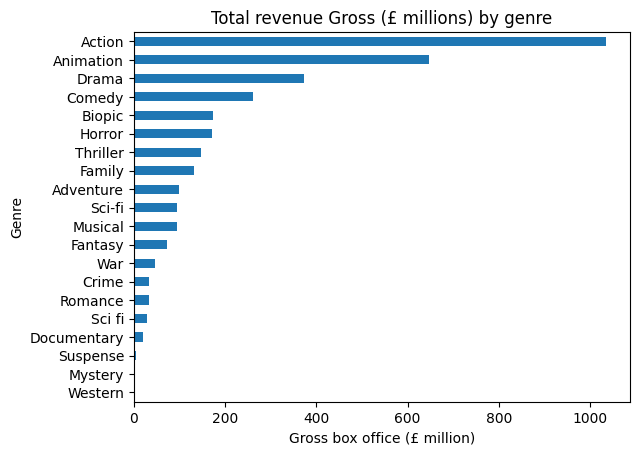

In [31]:
fig, axis = plt.subplots()

(
    genres.groupby("Genre")
    ["Gross box office (£ million)"]
    .sum()
    .sort_values()
    .plot
    .barh(ax=axis)
)

axis.set(
    title="Total revenue Gross (£ millions) by genre",
    xlabel='Gross box office (£ million)'
)

plt.show()

People like Action and Amniation flims. What is the distribution over time?

In [32]:
genres.groupby("Year").head(3)

,Year,Genre,Number of releases,Gross box office (£ million),Top performing title,covid_period
0,2018,Action,77,361.3,Avengers: Infinity War,pre-COVID
1,2018,Animation,46,242.2,Incredibles 2,pre-COVID
2,2018,Drama,246,154.1,A Star Is Born,pre-COVID
18,2019,Action,102,328.3,Avengers: Endgame,pre-COVID
19,2019,Animation,40,312.1,The Lion King,pre-COVID
20,2019,Drama,264,166.4,Downton Abbey,pre-COVID
35,2020,Action,36,48.5,Bad Boys For Life,COVID
36,2020,War,3,44.3,1917,COVID
37,2020,Animation,19,34.8,Sonic The Hedgehog,COVID
51,2021,Action,52,296.7,No Time to Die,post-lockdown


Let's look at the distributon YoY

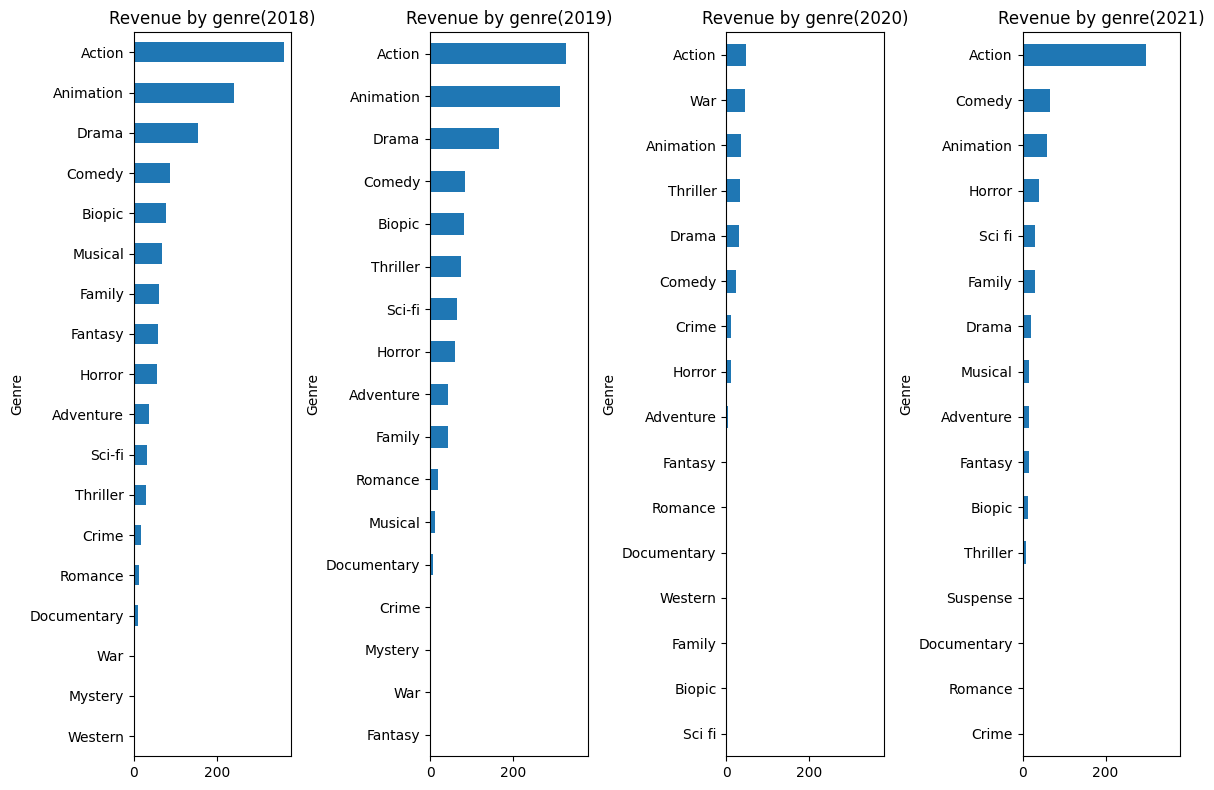

In [35]:
years = genres["Year"].unique()

fig, axes = plt.subplots(1, len(years), figsize=(3*len(years),8), sharex=True)

for idx, year in enumerate(years):
    (
        genres[genres["Year"] == year]
        .groupby("Genre")
        ["Gross box office (£ million)"]
        .sum()
        .sort_values()
        .plot
        .barh(ax=axes[idx])
    )

    axes[idx].set(
        title=f"Revenue by genre({year})"
    )


plt.tight_layout()
plt.show()

That gives quite a clear picture. Action films are the most popular, but there has been a rise in popularity of comedy films in 2021. Some theories:

- animations take years of effort and if animators weren't working at any point during COVID, that would have delayed the release of animated films in 2021
- comparatively comedies are probably cheaper to make (citation needed)
- people possibly prefer light-hearted relief in post-lockdown times
- the popularity of war films in 2020 is interesting
- 1917 was the War moive in 2020. It generatd lots of attention, but I can't a noteable war movie since then

# Distributors

In [36]:
distributors.head()

,Year,Distributor,Films on release,Box office gross (£ million),Market share
0,2018,Walt Disney,24,325.6,23.6
1,2018,Universal,40,268.5,19.5
2,2018,20th Century Fox,28,199.3,14.5
3,2018,Warner Bros,31,191.4,13.9
4,2018,Sony,33,146.8,10.7


In [38]:
distributors.loc[distributors['Year'] < 2020, 'covid_period'] = 'pre-COVID'
distributors.loc[distributors['Year'] == 2020, 'covid_period'] = 'COVID'
distributors.loc[distributors['Year'] > 2020, 'covid_period'] = 'post-lockdown'


distributors['covid_period'].value_counts(dropna=False)

,count
covid_period,
pre-COVID,22
COVID,11
post-lockdown,11


In [40]:
distributors.dtypes

,0
Year,int64
Distributor,object
Films on release,int64
Box office gross (£ million),float64
Market share,float64
covid_period,object


In [42]:
# make sure the market share columns adds up to 100
distributors.groupby("Year")['Market share'].sum()

,Market share
Year,
2018,100.1
2019,99.9
2020,100.1
2021,100.2


Who are the top three distributors?


In [43]:
distributors.groupby("Year").head(3)

,Year,Distributor,Films on release,Box office gross (£ million),Market share,covid_period
0,2018,Walt Disney,24,325.6,23.6,pre-COVID
1,2018,Universal,40,268.5,19.5,pre-COVID
2,2018,20th Century Fox,28,199.3,14.5,pre-COVID
11,2019,Walt Disney,24,506.8,37.9,pre-COVID
12,2019,Universal,39,185.6,13.9,pre-COVID
13,2019,Warner Bros,40,166.3,12.4,pre-COVID
22,2020,Entertainment One,30,49.4,15.9,COVID
23,2020,Sony,38,48.4,15.6,COVID
24,2020,Walt Disney,58,44.3,14.3,COVID
33,2021,Universal,51,180.8,30.6,post-lockdown


What did Entertainment One distribute???


One line plot per distributor showing market share over time would be interesting to see. For that, the data needs to be one column per distributor and one row per year.

In [46]:
(
    distributors
    .groupby(["Year", "Distributor"])
    ["Market share"]
    .sum()
    .unstack()
)

Distributor,20th Century Fox,20th Century Fox*,Entertainment,Entertainment Film Distributors,Entertainment One,Lionsgate,Other distributors (137),Other distributors (143),Others (128 distributors),Others (Total 130 distributors),Paramount,Park Circus,STX Entertainment,Shear Entertainment*,Sony,StudioCanal,Universal,Walt Disney,Warner Bros,eOne Films
Year,,,,,,,,,,,,,,,,,,,,
2018,14.5,NaN,1.1,NaN,NaN,1.5,NaN,NaN,4.5,NaN,4.8,NaN,NaN,NaN,10.7,2.8,19.5,23.6,13.9,3.2
2019,NaN,5.7,NaN,NaN,3.8,4.2,NaN,NaN,NaN,4.6,5.9,NaN,1.2,NaN,9.3,1.0,13.9,37.9,12.4,NaN
2020,NaN,NaN,NaN,4.3,15.9,4.5,NaN,7.5,NaN,NaN,8.0,NaN,NaN,1.3,15.6,4.5,12.5,14.3,11.7,NaN
2021,NaN,NaN,NaN,NaN,1.4,1.8,3.2,NaN,NaN,NaN,3.7,0.6,0.6,NaN,22.2,0.5,30.6,21.2,14.4,NaN
